* Code to show/display  tracking data per game/per player: ie given game can we visualize how all players( or one player ) move throughout the game.

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches



In [2]:
#datasets
week_data=pd.read_csv("../input/nfl-big-bowl-dataset/All_week_data.csv")
df=pd.read_csv("../input/nfl-big-bowl-dataset/merged_df.csv")


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (24,25,26,27,30,34,35,36,38,41,45,47,49,52,53,55,56,58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
week_data.head()

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [4]:
df.head()

,gameId,playId,nflId,pff_role,pff_positionLinedUp,pff_hit,pff_hurry,pff_sack,pff_beatenByDefender,pff_hitAllowed,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,25511,Pass,QB,NaN,NaN,NaN,NaN,NaN,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,Cover-1,Man
1,2021090900,97,35481,Pass Route,TE-L,NaN,NaN,NaN,NaN,NaN,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0.0,Cover-3,Zone
2,2021090900,97,35634,Pass Route,LWR,NaN,NaN,NaN,NaN,NaN,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,Cover-3,Zone
3,2021090900,97,39985,Pass Route,HB-R,NaN,NaN,NaN,NaN,NaN,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1.0,Cover-3,Zone
4,2021090900,97,40151,Pass Block,C,NaN,NaN,NaN,0.0,0.0,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0.0,Cover-3,Zone


In [5]:
df.columns

Index(['gameId', 'playId', 'nflId', 'pff_role', 'pff_positionLinedUp',
       'pff_hit', 'pff_hurry', 'pff_sack', 'pff_beatenByDefender',
       'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed',
       'pff_nflIdBlockedPlayer', 'pff_blockType', 'pff_backFieldBlock',
       'height', 'weight', 'birthDate', 'collegeName', 'officialPosition',
       'displayName', 'gameId.1', 'season', 'week', 'gameDate',
       'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'gameId.2',
       'playId.1', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
  

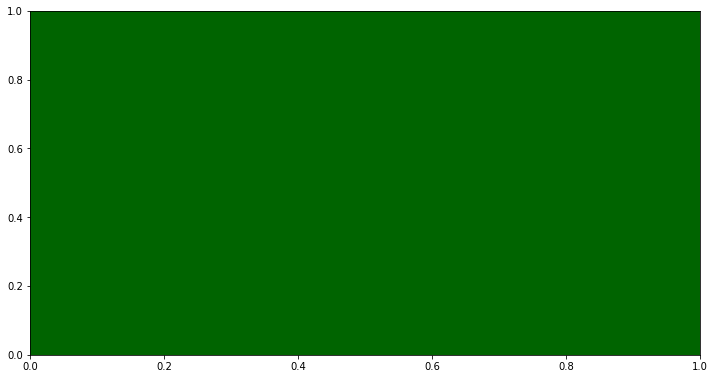

In [6]:
# Create a rectangle defined via an anchor point *xy* and its *width* and *height*
rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

# Creating a subplot to plot our field on
fig, ax = plt.subplots(1, figsize=(12, 6.33))

# Adding the rectangle to the plot
ax.add_patch(rect)

In [7]:

##field creation taken from another notebook

def create_football_field():
    
    # Create a rectangle defined via an anchor point *xy* and its *width* and *height*
    rect = patches.Rectangle((0, 0), 120, 53.3, facecolor='darkgreen', zorder=0)

    # Creating a subplot to plot our field on
    fig, ax = plt.subplots(1, figsize=(12, 6.33))

    # Adding the rectangle to the plot
    ax.add_patch(rect)

    # Plotting a line plot for marking the field lines
    plt.plot([10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 
              0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white', zorder = 0)

    # Creating the left end-zone
    left_end_zone = patches.Rectangle((0, 0), 10, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Creating the right end-zone
    right_end_zone = patches.Rectangle((110, 0), 120, 53.3, facecolor='blue', alpha=0.2, zorder=0)

    # Adding the patches to the subplot
    ax.add_patch(left_end_zone)
    ax.add_patch(right_end_zone)

    # Setting the limits of x-axis from 0 to 120
    plt.xlim(0, 120)

    # Setting the limits of y-axis from -5 to 58.3
    plt.ylim(-5, 58.3)

    # Removing the axis values from the plot
    plt.axis('off')

    # Plotting the numbers starting from x = 20 and ending at x = 110
    # with a step of 10
    for x in range(20, 110, 10):

        # Intializing another variable named 'number'
        number = x

        # If x exceeds 50, subtract it from 120
        if x > 50:
            number = 120 - x

        # Plotting the text at the bottom
        plt.text(x, 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')

        # Plotting the text at the top
        plt.text(x - 0.95, 53.3 - 5, str(number - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white',
                 rotation=180)

    # Making ground markings
    for x in range(11, 110):
            ax.plot([x, x], [0.4, 0.7], color='white', zorder = 0)
            ax.plot([x, x], [53.0, 52.5], color='white', zorder = 0)
            ax.plot([x, x], [22.91, 23.57], color='white', zorder = 0)
            ax.plot([x, x], [29.73, 30.39], color='white', zorder = 0)
    
    # Returning the figure and axis
    return fig, ax 

In [16]:
print("max date:",week_data.time.max())
print("min date:",week_data.time.min())

max date: 2021-11-02T03:20:26.900
min date: 2021-09-10T00:26:31.100


(<Figure size 864x455.76 with 1 Axes>, <AxesSubplot:>)

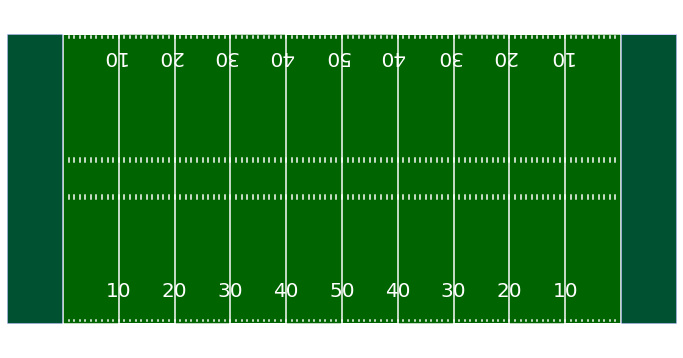

In [8]:
create_football_field()

In [28]:
# # Selecting the player
player_id=39985
df_subs=week_data[(week_data.nflId==player_id) & (week_data.gameId==2021090900) &(week_data['time'] > '2021-09-10T00:26:31.100') & (week_data['time'] <= '2021-9-10T00:26:31.100') ]
#  
df_subs

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,s,a,dis,o,dir,event
130,2021090900,97,39985.0,2,2021-09-10T00:26:31.200,25.0,TB,right,37.55,22.25,0.11,0.07,0.01,90.81,138.19,None
131,2021090900,97,39985.0,3,2021-09-10T00:26:31.300,25.0,TB,right,37.53,22.22,0.12,0.07,0.03,87.40,163.85,None
132,2021090900,97,39985.0,4,2021-09-10T00:26:31.400,25.0,TB,right,37.54,22.24,0.06,0.06,0.02,89.98,139.31,None
133,2021090900,97,39985.0,5,2021-09-10T00:26:31.500,25.0,TB,right,37.56,22.26,0.05,0.05,0.02,91.23,95.90,None
134,2021090900,97,39985.0,6,2021-09-10T00:26:31.600,25.0,TB,right,37.55,22.27,0.04,0.04,0.01,91.23,73.76,ball_snap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92088,2021090900,4772,39985.0,25,2021-09-10T03:51:00.900,25.0,TB,right,94.46,44.77,5.30,4.80,0.52,324.45,46.55,None
92089,2021090900,4772,39985.0,26,2021-09-10T03:51:01.000,25.0,TB,right,94.81,45.17,5.37,5.23,0.53,326.39,38.72,None
92090,2021090900,4772,39985.0,27,2021-09-10T03:51:01.100,25.0,TB,right,95.12,45.61,5.54,5.32,0.54,326.39,32.07,None
92091,2021090900,4772,39985.0,28,2021-09-10T03:51:01.200,25.0,TB,right,95.39,46.10,5.68,5.05,0.56,323.05,26.46,None


In [30]:
ball=week_data[ week_data.nflId.isnull() & ((week_data.gameId==2021090900)) & (week_data['time'] > '2021-09-10T00:26:31.100') & (week_data['time'] <= '2021-10-10T00:26:31.100') ]

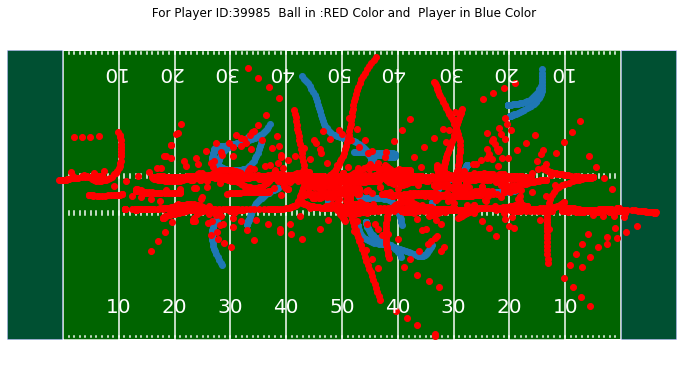

In [33]:
#this is how move throug out the year

# Creating the football field
fig, ax = create_football_field()

# Plotitng the home team
ax=plt.scatter(df_subs.x,df_subs.y)

# # Plotting the football
ax=plt.scatter(ball.x,ball.y,color="red")

# # Displaying the plot
plt.title(f' For Player ID:{player_id}  Ball in :RED Color and  Player in Blue Color')
 
plt.show()